In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

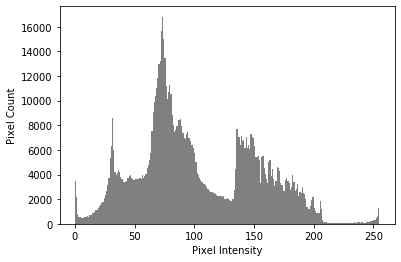

In [4]:
image = cv2.imread("Image_Database/road.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.hist(image.ravel(), bins=255, color="gray")
plt.xlabel("Pixel Intensity")
plt.ylabel("Pixel Count")
plt.show()

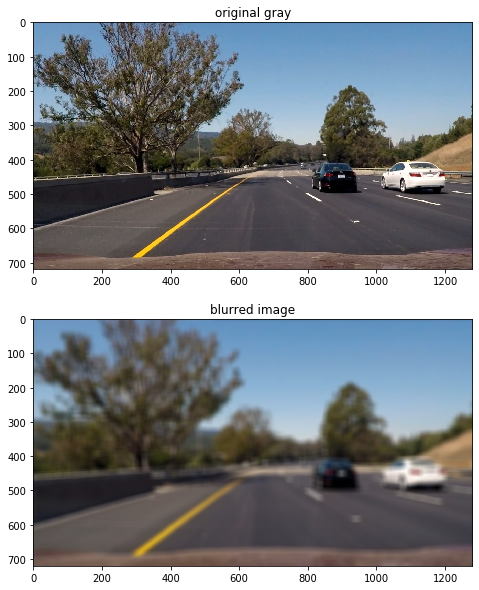

In [2]:
image = cv2.imread("Image_Database/road.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)


smallBlur = np.ones((20, 20), dtype="float") * (1.0 / (20 * 20))

filtered_image = cv2.filter2D(image, -1, smallBlur)

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,10))

ax1.set_title('original gray')
ax1.imshow(image, cmap='gray')
ax2.set_title('blurred image')
ax2.imshow(filtered_image, cmap='gray')
plt.show()

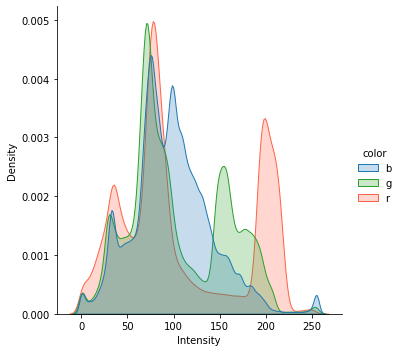

In [3]:
from image_demo import plotRGBDistribution

plotRGBDistribution(image)

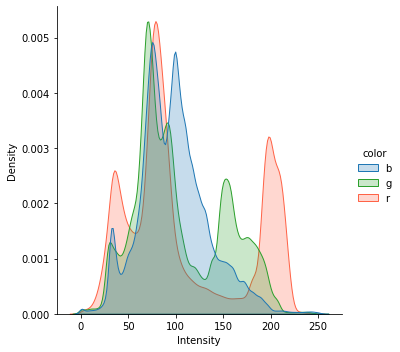

In [4]:
from image_demo import plotRGBDistribution

plotRGBDistribution(filtered_image)

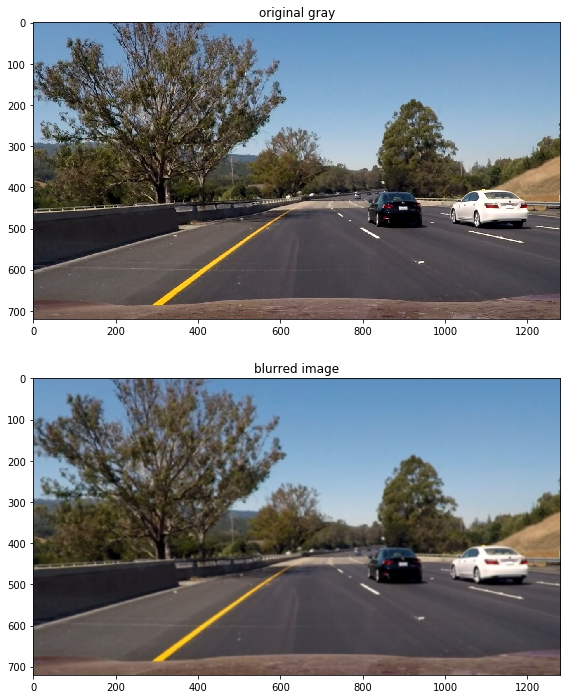

In [20]:
image = cv2.imread("Image_Database/road.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)


filtered_image = cv2.GaussianBlur(image, (9, 9), 0)

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,12))

ax1.set_title('original gray')
ax1.imshow(image, cmap='gray')
ax2.set_title('blurred image')
ax2.imshow(filtered_image, cmap='gray')
plt.show()

### RGB Distribution using Histograms

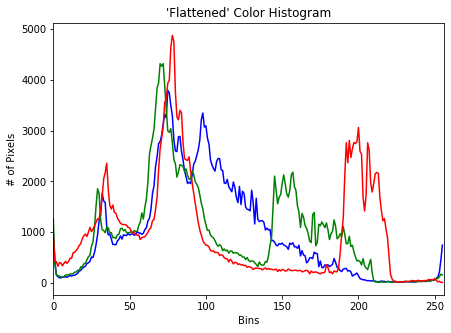

In [14]:
image = cv2.imread("Image_Database/road.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image  = cv2.resize(image, (500,500))

chans = cv2.split(image)
colors = ("b", "g", "r")
plt.figure(figsize=(7,5))
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
features = []
# loop over the image channels
for (chan, color) in zip(chans, colors):
	# create a histogram for the current channel and
	# concatenate the resulting histograms for each
	# channel
	hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
	features.extend(hist)
	# plot the histogram
	plt.plot(hist, color = color)
	plt.xlim([0, 256])

<Figure size 1440x1440 with 0 Axes>

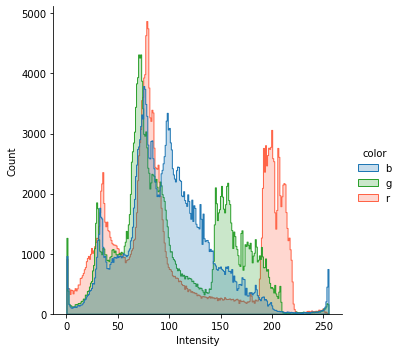

In [27]:
df = pd.DataFrame()
df["Intensity"] = image[:, :, 0].ravel()
df["color"] = "b"
df2 = pd.DataFrame()
df2["Intensity"] = image[:, :, 1].ravel()
df2["color"] = "g"
df3 = pd.DataFrame()
df3["Intensity"] = image[:, :, 2].ravel()
df3["color"] = "r"
df = df.append(df2)
df = df.append(df3)

plt.figure(figsize=(20,20))
sns.displot(df, x="Intensity", bins=256,hue="color",element="step", palette=["C0", "C2", "tomato"])
plt.show()

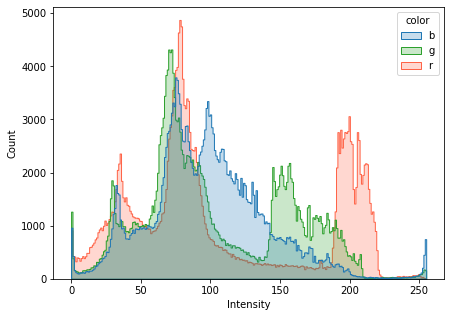

In [29]:
plt.figure(figsize=(7,5))
sns.histplot(df, x="Intensity", bins=256,hue="color",element="step", palette=["C0", "C2", "tomato"])
plt.show()

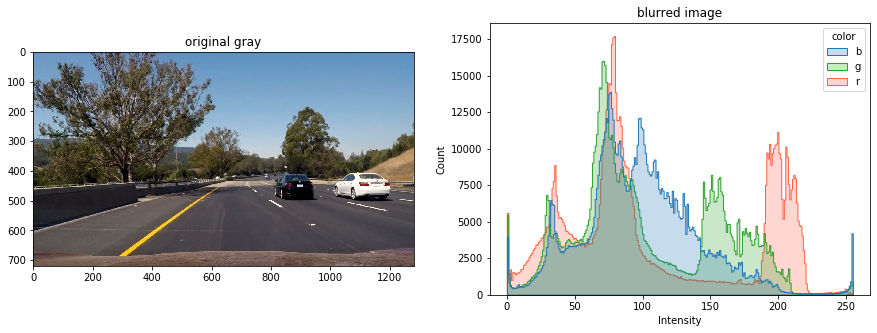

In [37]:
from image_demo import plotRGBDistribution

image = cv2.imread("Image_Database/road.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax1.set_title('original gray')
ax1.imshow(image)
ax2.set_title('blurred image')
plotRGBDistribution(image, ax2)
plt.show()